The objective of the notebook is to analysis a data set of different house prices across the united stat and perform EDA on it  


First importing the necessary libraries 

In [58]:
import skillsnetwork
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
import os
import numpy as np
import pandas as pd
import skillsnetwork
from scipy.stats import boxcox
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import keras 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

path='data/data.csv'
data=pd.read_csv(path ,)
data2=data

SyntaxError: EOL while scanning string literal (2306343824.py, line 27)

The dataset contains house sales prices in the state of Washington between May and July of 2014  in the  with the details of a description of each item and the sales price. 

checking the dataset info and description

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


    Isolating the numeric fields and Min max normalizing them then box plotting them to check their distribution

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'price'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'bathrooms'),
  Text(4, 0, 'sqft_living'),
  Text(5, 0, 'sqft_lot'),
  Text(6, 0, 'floors'),
  Text(7, 0, 'waterfront'),
  Text(8, 0, 'view'),
  Text(9, 0, 'condition'),
  Text(10, 0, 'sqft_above'),
  Text(11, 0, 'sqft_basement'),
  Text(12, 0, 'yr_built'),
  Text(13, 0, 'yr_renovated')])

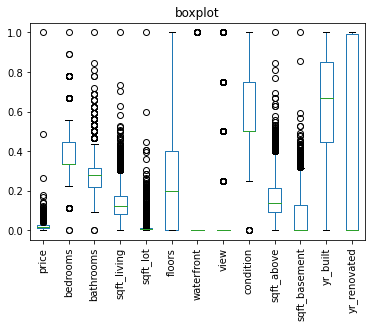

In [4]:
df= data2.select_dtypes(include = ['float64', 'int64'])
df_norm = (df-df.min())/(df.max()-df.min())
plt.rcParams["figure.figsize"] = (10,7.5)
ax = df_norm.plot(kind='box', title='boxplot')
plt.xticks(rotation='vertical')

pairploting the normlaized values

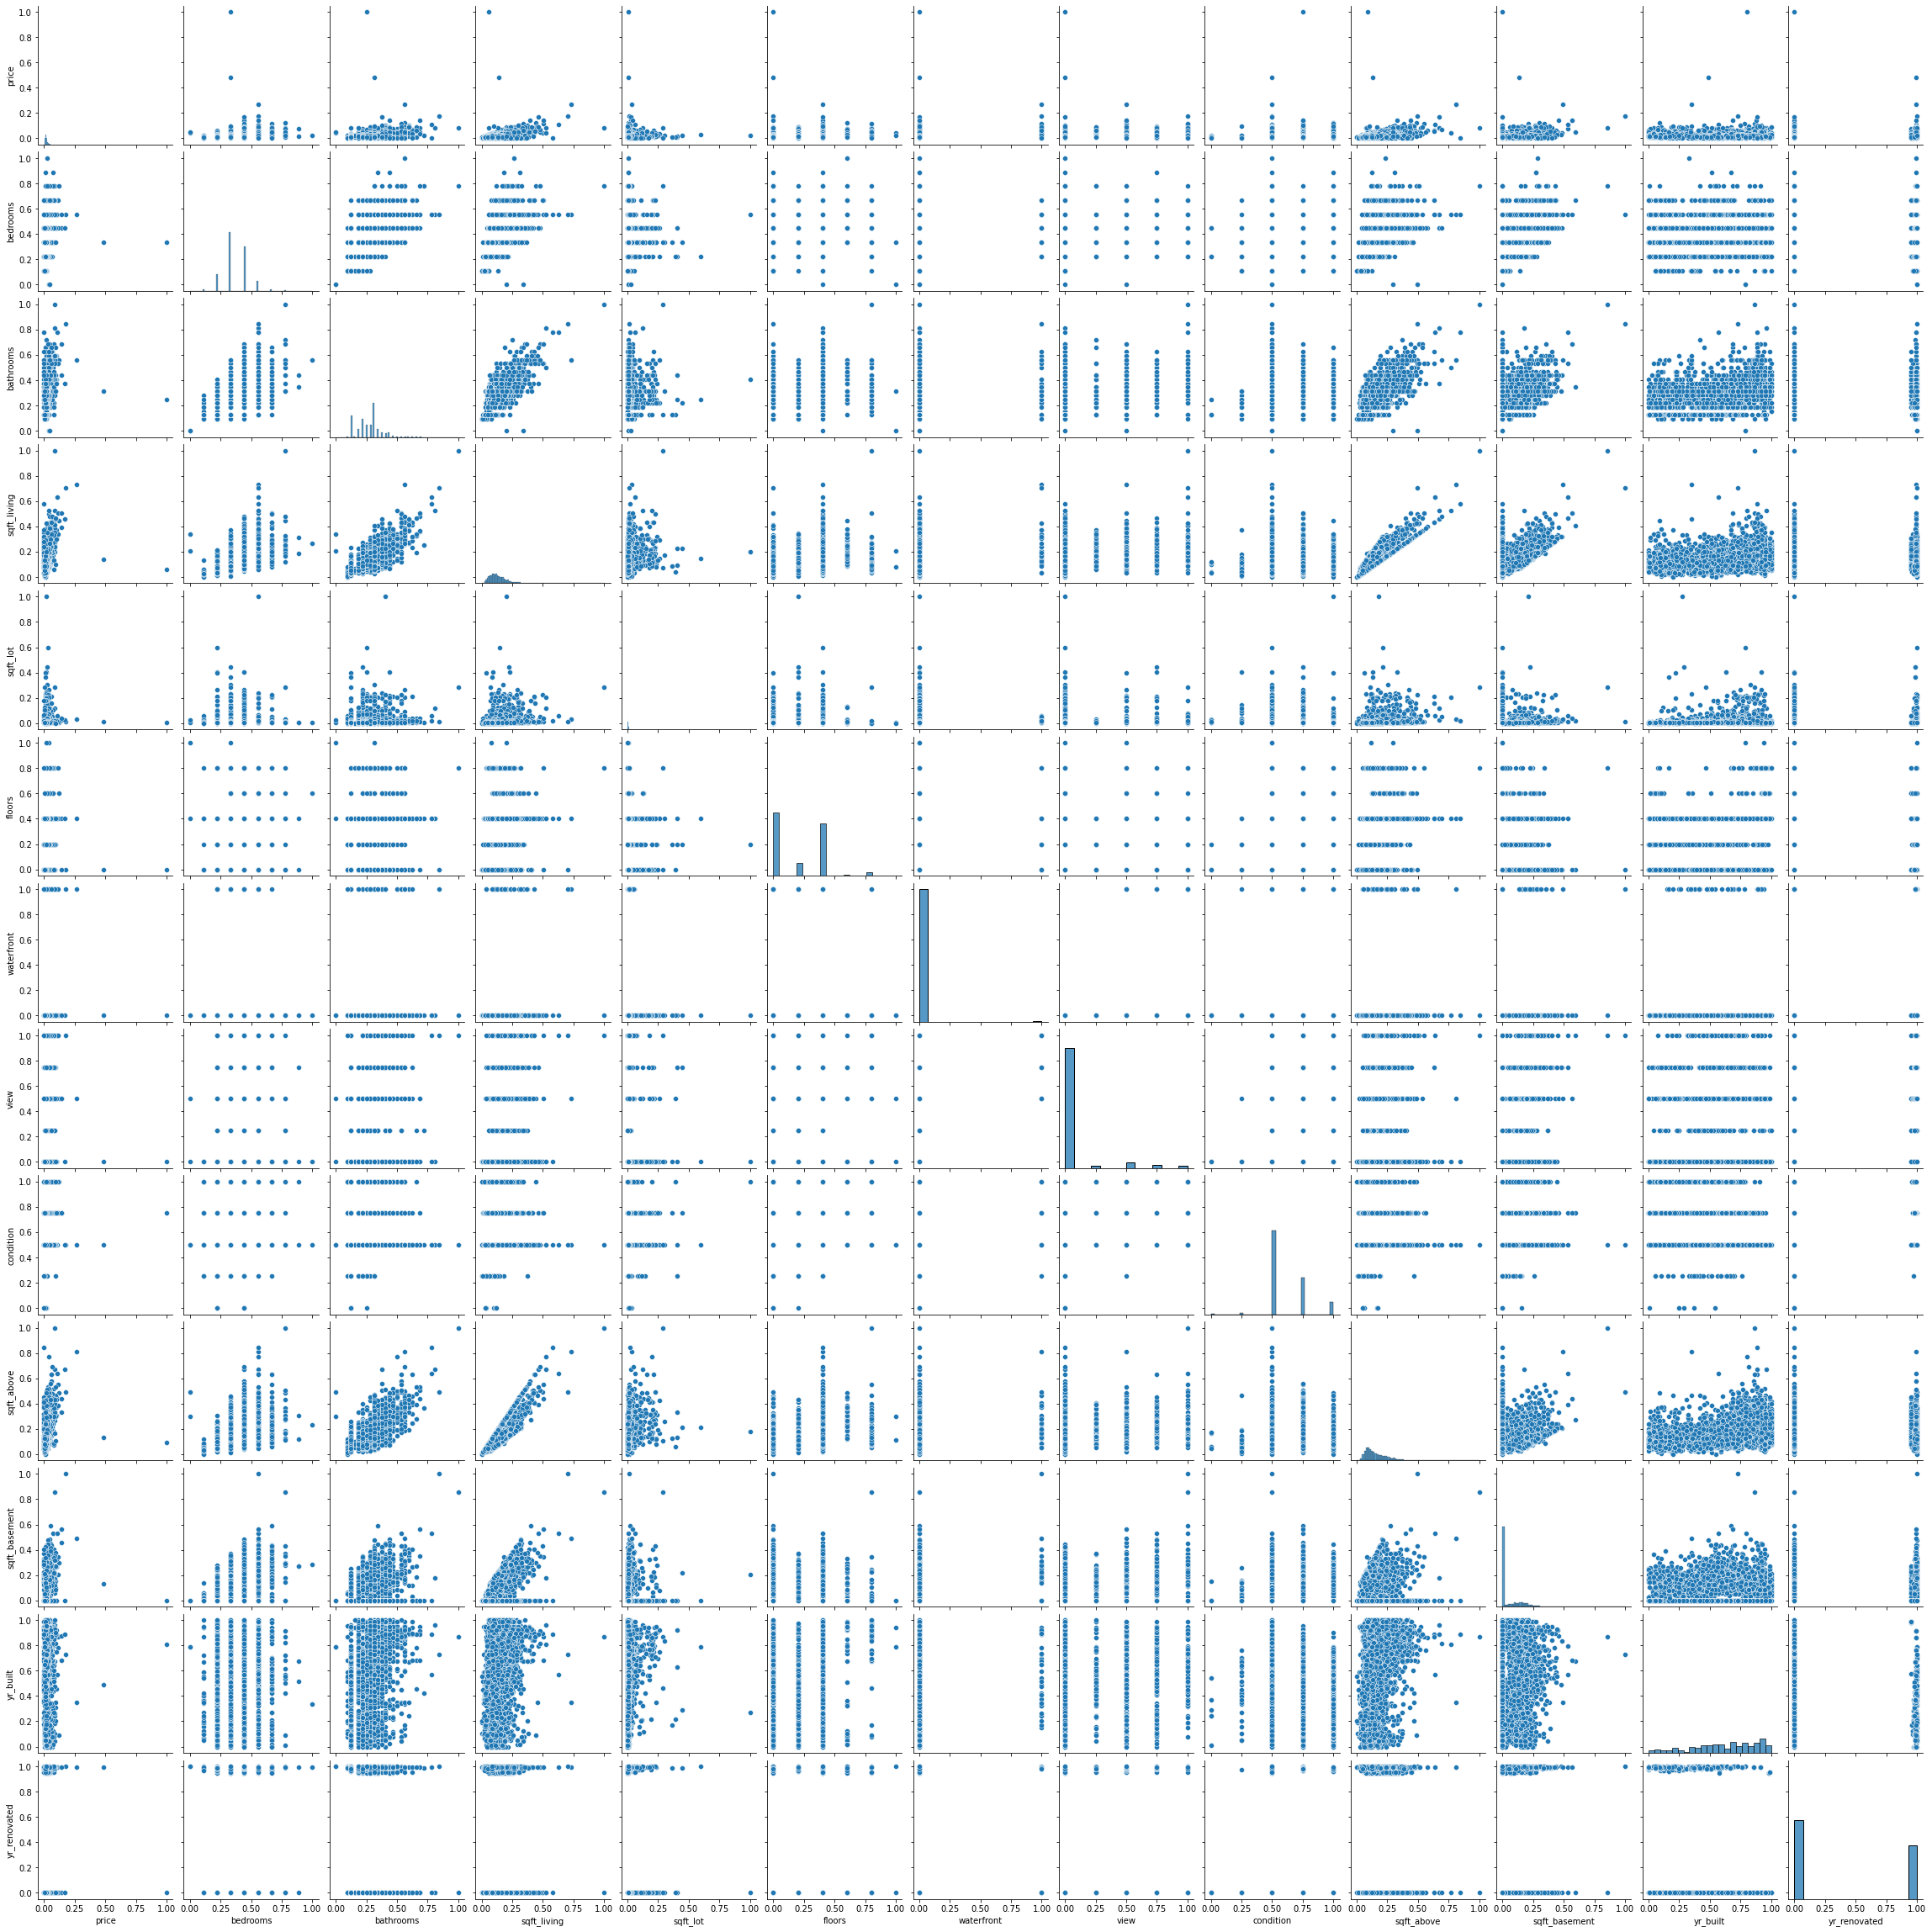

In [5]:
sns.pairplot(df_norm, )

Plotting the price against the other variables and calculating their correlation 


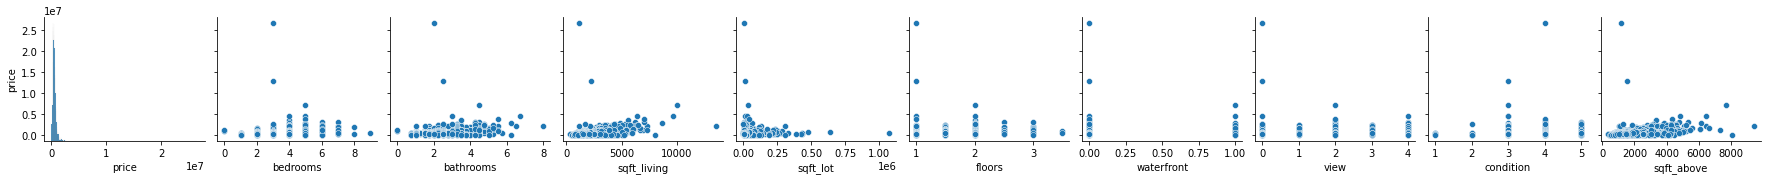

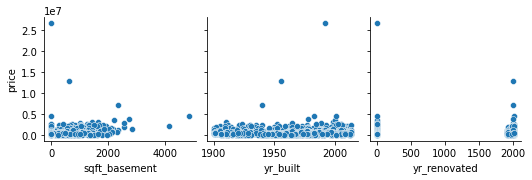

In [6]:
dt_num = data.select_dtypes(include = ['float64', 'int64'])
dt_num_corr = dt_num.corr()['price'][:-1]
for i in range(0, len(dt_num.columns), 10):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+10],
                y_vars=['price'])


In [7]:
dt_num_corr 

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
Name: price, dtype: float64

checking for duplicates

In [8]:
data.duplicated().sum()


0

going through every column and removing extreme outliers

<AxesSubplot:>

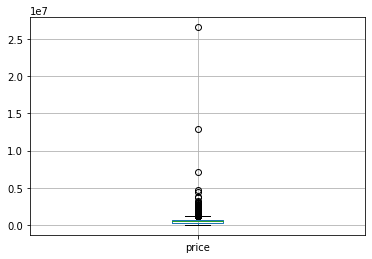

In [9]:
data.boxplot('price')
    


In [10]:
data.sort_values(by = 'price', ascending = False)[:20]
data1 = data.drop(data[(data['price'] >4.668000e+06)].index)
data1.sort_values(by = 'price', ascending = False)[:20]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2654,2014-06-17 00:00:00,4.668000e+06,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4.489000e+06,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
3729,2014-07-01 00:00:00,3.800000e+06,5.0,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
1637,2014-05-30 00:00:00,3.710000e+06,4.0,3.50,5550,28078,2.0,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
252,2014-05-07 00:00:00,3.200000e+06,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
1567,2014-05-29 00:00:00,3.100000e+06,6.0,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
2772,2014-06-18 00:00:00,3.000000e+06,4.0,4.25,4850,12445,2.0,1,4,5,3850,1000,1989,0,11031 Champagne Point Rd NE,Kirkland,WA 98034,USA
2328,2014-06-11 00:00:00,2.888000e+06,5.0,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
1571,2014-05-29 00:00:00,2.750000e+06,4.0,3.25,4430,21000,2.0,0,0,3,4430,0,1952,2007,3239 78th Pl NE,Medina,WA 98039,USA
2083,2014-06-08 00:00:00,2.700000e+06,4.0,3.25,4420,7850,2.0,1,4,3,3150,1270,2001,0,17834 SE 40th Pl,Bellevue,WA 98008,USA


<AxesSubplot:>

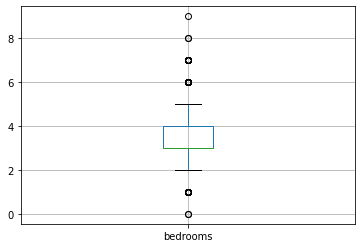

In [11]:
data1.boxplot('bedrooms')
    

<AxesSubplot:>

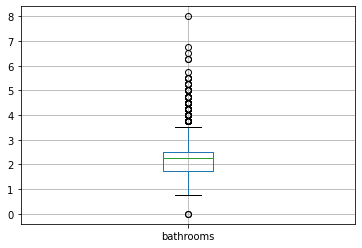

In [12]:
data1.boxplot('bathrooms')


<AxesSubplot:>

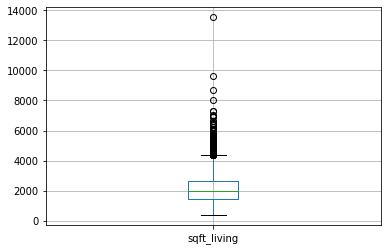

In [13]:
data1.boxplot('sqft_living')

In [14]:
data1 = data1.drop(data1[(data1['sqft_living'] >9640)].index)
data1.sort_values(by = 'sqft_living', ascending = False)[:20]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2328,2014-06-11 00:00:00,2888000.0,5.0,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
4575,2014-07-02 00:00:00,0.0,5.0,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,WA 98006,USA
4138,2014-07-08 00:00:00,1135250.0,5.0,4.00,7320,217800,2.0,0,0,3,7320,0,1992,0,19100 SE 174th St,Renton,WA 98058,USA
462,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3729,2014-07-01 00:00:00,3800000.0,5.0,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
1567,2014-05-29 00:00:00,3100000.0,6.0,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
2967,2014-06-20 00:00:00,1135000.0,6.0,4.25,6900,244716,2.0,0,0,4,4820,2080,2002,0,16903 246th Ave NE,Woodinville,WA 98077,USA
3559,2014-06-27 00:00:00,1820000.0,4.0,4.50,6640,53330,2.0,0,0,3,6640,0,1993,0,21909 NE 141st St,Woodinville,WA 98077,USA
3004,2014-06-20 00:00:00,1240000.0,7.0,5.50,6630,13782,2.0,0,0,3,4930,1700,2004,2003,16659 SE 69th Way,Bellevue,WA 98006,USA


In [15]:
data1 = data1.drop(data1[(data1['sqft_lot'] >478288)].index)
data1.sort_values(by = 'sqft_lot', ascending = False)[:20]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3487,2014-06-26 00:00:00,6.670000e+05,3.0,1.75,3320,478288,1.5,0,3,4,2260,1060,1933,1982,40201 292nd Ave SE,Enumclaw,WA 98022,USA
375,2014-05-08 00:00:00,3.300000e+05,2.0,2.00,1550,435600,1.5,0,0,2,1550,0,1972,0,36521 SE 94th St,Snoqualmie,WA 98065,USA
879,2014-05-19 00:00:00,4.800000e+05,4.0,3.50,3370,435600,2.0,0,3,3,3370,0,2005,0,44250 SE Edgewick Rd,North Bend,WA 98045,USA
1539,2014-05-29 00:00:00,3.020000e+05,2.0,1.00,900,423838,1.0,0,2,5,900,0,1925,0,18923 SE 416th St,Enumclaw,WA 98022,USA
3056,2014-06-23 00:00:00,2.300000e+05,3.0,1.00,1530,389126,1.5,0,0,4,1530,0,1919,1985,24727 SE Mud Mountain Rd,Enumclaw,WA 98022,USA
240,2014-05-07 00:00:00,6.300000e+05,3.0,2.50,2680,327135,2.0,0,0,3,2680,0,1995,0,25339 SE 248th St,Ravensdale,WA 98051,USA
4353,2014-05-05 00:00:00,1.178333e+05,3.0,1.00,1340,306848,1.0,0,0,3,1340,0,1953,0,17827 Mountain View Rd NE,Duvall,WA 98019,USA
3346,2014-06-25 00:00:00,1.005000e+06,4.0,4.50,4225,284011,2.0,0,0,4,4225,0,1985,0,23711 NE 4th St,Sammamish,WA 98074,USA
3122,2014-06-23 00:00:00,6.490000e+05,2.0,1.75,2260,280962,2.0,0,2,3,1890,370,2005,0,29836 NE Tolt Hill Rd,Carnation,WA 98014,USA
3448,2014-06-26 00:00:00,5.680000e+05,4.0,1.75,2110,265716,1.0,0,0,4,2110,0,1979,0,5519 236th Ave NE,Redmond,WA 98053,USA


In [16]:
data1 = data1.drop(data1[(data1['sqft_lot'] >478288)].index)
data1.sort_values(by = 'yr_renovated', ascending = False)[:20]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3567,2014-06-27 00:00:00,500000.0,4.0,1.00,1440,7100,1.5,0,0,3,1440,0,1906,2014,3006 NW 60th St,Seattle,WA 98107,USA
2552,2014-06-16 00:00:00,309212.0,3.0,1.75,1150,9600,1.0,0,0,3,1150,0,1979,2014,42511 SE 175th Pl,North Bend,WA 98045,USA
768,2014-05-15 00:00:00,575000.0,4.0,2.50,3020,17810,1.0,0,0,3,1600,1420,1979,2014,4527-4553 NE 201st Pl,Lake Forest Park,WA 98155,USA
2313,2014-06-11 00:00:00,740000.0,4.0,2.75,2490,17833,2.0,0,2,3,1490,1000,1979,2014,12537 41st Ave NE,Seattle,WA 98125,USA
3662,2014-06-30 00:00:00,408000.0,5.0,3.25,2820,6589,1.5,0,0,3,2320,500,1906,2014,7403 48th Ave S,Seattle,WA 98118,USA
3680,2014-06-30 00:00:00,500000.0,4.0,3.00,3720,15048,3.0,0,0,3,3720,0,1979,2014,10218 147th Ave SE,Renton,WA 98059,USA
187,2014-05-06 00:00:00,218000.0,3.0,1.75,1850,7684,1.0,0,0,3,1320,530,1979,2014,33945 28th Pl SW,Federal Way,WA 98023,USA
575,2014-05-13 00:00:00,550000.0,7.0,4.00,3440,8100,2.0,0,0,3,3440,0,1970,2014,718 N 95th St,Seattle,WA 98103,USA
567,2014-05-13 00:00:00,799200.0,6.0,3.00,2890,2370,2.5,0,0,3,2290,600,1906,2014,420 Boylston Ave E,Seattle,WA 98102,USA
792,2014-05-16 00:00:00,239900.0,4.0,2.25,1860,7000,1.0,0,0,3,1120,740,1979,2014,401 SW 322nd St,Federal Way,WA 98023,USA


Box plotting the proceed data


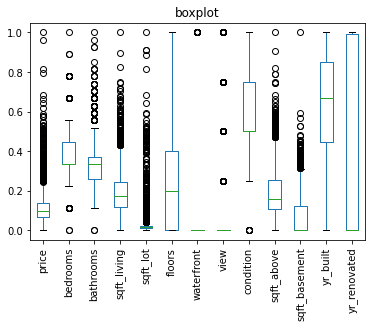

In [17]:
df= data1.select_dtypes(include = ['float64', 'int64'])
df_norm = (df-df.min())/(df.max()-df.min())
ax = df_norm.plot(kind='box', title='boxplot',rot =90)

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4594 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4594 non-null   object 
 1   price          4594 non-null   float64
 2   bedrooms       4594 non-null   float64
 3   bathrooms      4594 non-null   float64
 4   sqft_living    4594 non-null   int64  
 5   sqft_lot       4594 non-null   int64  
 6   floors         4594 non-null   float64
 7   waterfront     4594 non-null   int64  
 8   view           4594 non-null   int64  
 9   condition      4594 non-null   int64  
 10  sqft_above     4594 non-null   int64  
 11  sqft_basement  4594 non-null   int64  
 12  yr_built       4594 non-null   int64  
 13  yr_renovated   4594 non-null   int64  
 14  street         4594 non-null   object 
 15  city           4594 non-null   object 
 16  statezip       4594 non-null   object 
 17  country        4594 non-null   object 
dtypes: float

Plotting the average prices for each possible value of the flowing fields:
'bedrooms','bathrooms','floors','waterfront','view','condition'

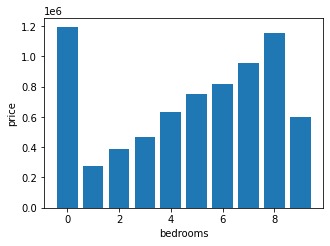

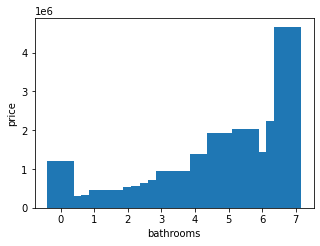

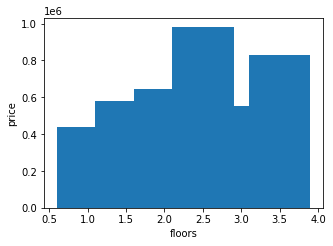

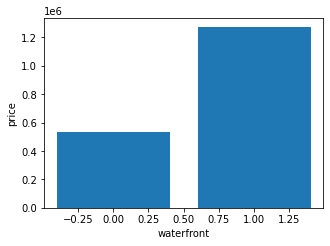

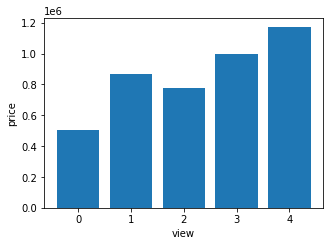

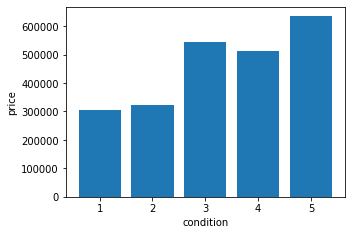

<Figure size 360x252 with 0 Axes>

In [19]:
for col in ['bedrooms','bathrooms','floors','waterfront','view','condition',]:
  plt.rcParams["figure.figsize"] = (5,3.5)   
  t=data1.groupby(col).mean()
  t.reset_index(inplace=True)
  ax = plt.axes()
  ax.bar(t[col],t['price'])
  ax.set(xlabel=col, 
       ylabel='price')
 
  plt.figure()

In [20]:
dt_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


extracting the fields with corrleation higher than 0.5 with the price

In [21]:


dt_num = data1.select_dtypes(include = ['float64', 'int64'])
dt_num_corr = dt_num.corr()['price'][:] # -1 means that the latest row is SalePrice
top_features = dt_num_corr[abs(dt_num_corr) >.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))


There is 4 strongly correlated values with SalePrice:
price          1.000000
sqft_living    0.665613
sqft_above     0.566416
bathrooms      0.500751
Name: price, dtype: float64


doing the pairplots again without 'bedrooms','bathrooms','floors','waterfront','view','condition'

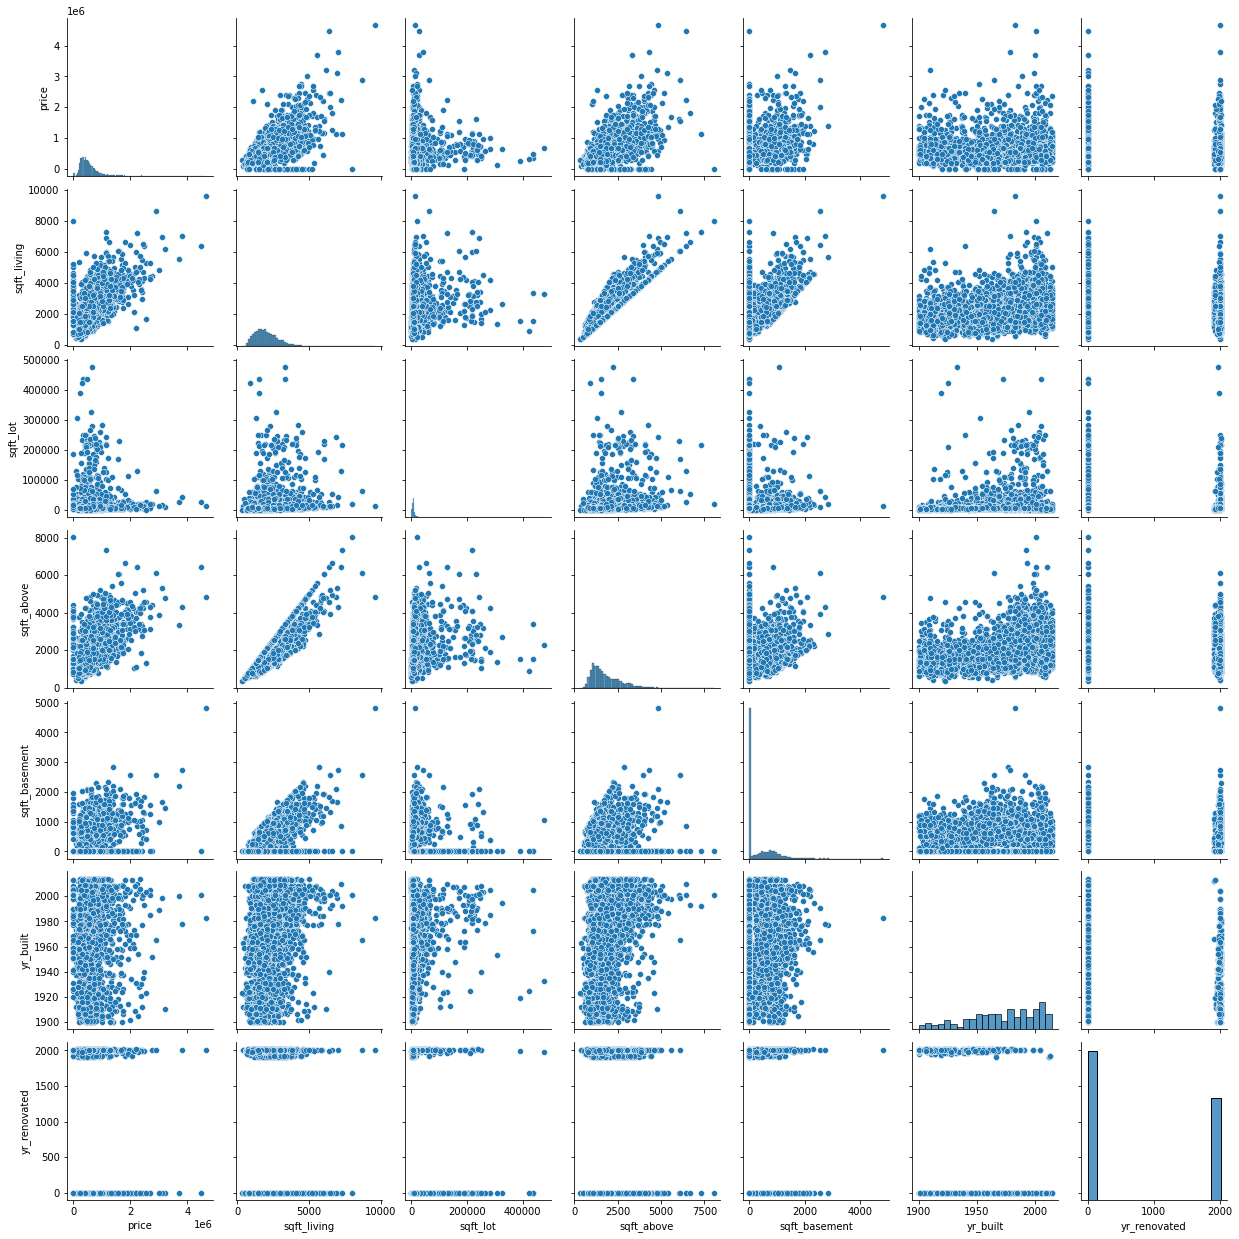

In [22]:
dt_num2=dt_num.drop(['bedrooms','bathrooms','floors','waterfront','view','condition',], axis=1)

sns.pairplot(dt_num2)


checking for skew 

In [23]:
skevals=dt_num2.skew()
skevals


price            3.009210
sqft_living      1.345339
sqft_lot         7.155592
sqft_above       1.341170
sqft_basement    1.555797
yr_built        -0.502538
yr_renovated     0.386441
dtype: float64

using boxcox transformaiton on columns with skew higher than .75

In [24]:
skew_limit = 0.75 # define a limit above which we will log transform

skew_cols = (skevals
             
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols.reset_index(inplace=True)
skew_cols

,index,Skew
0,price,3.009210
1,sqft_living,1.345339
2,sqft_lot,7.155592
3,sqft_above,1.341170
4,sqft_basement,1.555797


In [25]:
for col,skew in zip(skew_cols['index'],skevals):
  if   col== "price":
    continue 
 
  
  data1[col]+=1
  data1[col] , l= boxcox(data1[col])
  if   col== "price":
   print(l)

In [26]:
skevals=data1.skew()
skevals


price             3.009210
bedrooms          0.447992
bathrooms         0.538652
sqft_living      -0.000416
sqft_lot         -0.079896
floors            0.550258
waterfront       11.860074
view              3.347654
condition         0.958661
sqft_above        0.014804
sqft_basement     0.409381
yr_built         -0.502538
yr_renovated      0.386441
dtype: float64

droping not relvant columns

In [27]:
data2=data1.drop(['street','country','date'], axis=1)


In [28]:
data1.shape

(4594, 18)

In [29]:
data2.shape

(4594, 15)

In [30]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.594000e+03,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,5.417514e+05,3.399869,2.158794,9.606595,4.487050,1.511754,0.006966,0.239660,3.451676,3.683496,1.496735,1970.789943,808.355899
std,3.570985e+05,0.907002,0.778590,0.675125,0.178227,0.537990,0.083178,0.776468,0.677107,0.086650,1.826451,29.735287,979.359977
min,0.000000e+00,0.000000,0.000000,7.105987,3.849262,1.000000,0.000000,0.000000,1.000000,3.333246,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,9.145595,4.399024,1.000000,0.000000,0.000000,3.000000,3.618978,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,9.617965,4.490553,1.500000,0.000000,0.000000,3.000000,3.679407,0.000000,1976.000000,0.000000
75%,6.528750e+05,4.000000,2.500000,10.067720,4.562010,2.000000,0.000000,0.000000,4.000000,3.751110,3.700532,1997.000000,1999.000000
max,4.668000e+06,9.000000,6.750000,12.243231,5.092227,3.500000,1.000000,4.000000,5.000000,3.955304,4.209542,2014.000000,2014.000000


one hot encoding the non numric columns

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

mask = data2.dtypes == object
categorical_cols = data2.columns[mask]
categorical_cols
cate=data2[categorical_cols]
cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4594 entries, 0 to 4599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      4594 non-null   object
 1   statezip  4594 non-null   object
dtypes: object(2)
memory usage: 267.7+ KB


In [32]:
cate.groupby('statezip').count().sort_values(by = 'city', ascending = False)

,city
statezip,
WA 98103,148
WA 98052,135
WA 98117,132
WA 98115,130
WA 98006,110
...,...
WA 98047,6
WA 98288,3
WA 98050,2


In [33]:
cate.groupby('city').count().sort_values(by = 'statezip', ascending = False)

,statezip
city,
Seattle,1572
Renton,293
Bellevue,285
Redmond,234
Kirkland,187
Issaquah,186
Kent,184
Auburn,176
Sammamish,175


Grouping  the categories that have less than  10 values in one categories

In [34]:
mask = cate['city'].map(cate['city'].value_counts()) < 10

cate['city'] = cate['city'].mask(mask, 'other')
mask = cate['statezip'].map(cate['statezip'].value_counts()) < 10

cate['statezip'] = cate['statezip'].mask(mask, 'other')

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohc = OneHotEncoder( drop='first',)
le = LabelEncoder()
data3col=cate.columns

for col in data3col:
    
    # Integer encode the string categories
    dat = le.fit_transform(cate[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    cate = cate.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=cate.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    cate = pd.concat([cate, new_df], axis=1)
cate

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == "__main__":
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curren

,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8,city_9,...,statezip_60,statezip_61,statezip_62,statezip_63,statezip_64,statezip_65,statezip_66,statezip_67,statezip_68,statezip_69
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Plotting the average price of states and cities

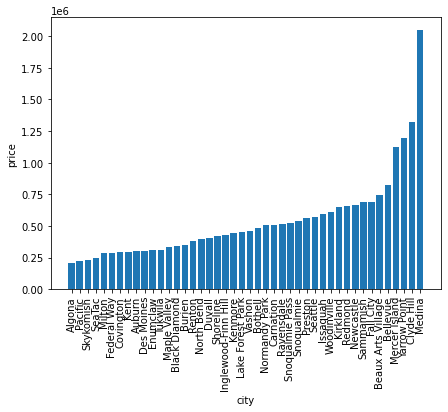

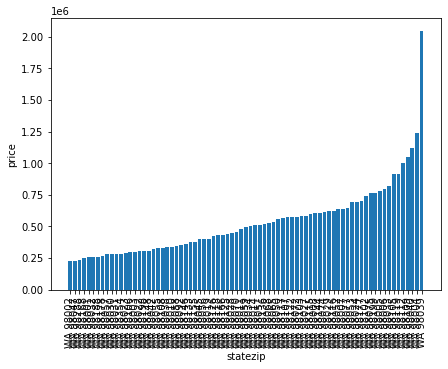

<Figure size 504x360 with 0 Axes>

In [36]:
for col in ['city','statezip']:
  
  plt.rcParams["figure.figsize"] = (7,5)  
  t=data2.groupby(col).mean()
  t.reset_index(inplace=True)
  t=t.sort_values(by = 'price', ascending = True)
  ax = plt.axes()
  ax.bar(t[col],t['price'])
  ax.set(xlabel=col, 
       ylabel='price')
  plt.xticks(rotation='vertical')  
  plt.figure()


training regression modles in the data to figure how much each factor affects the price

In [37]:

data2 = data2.drop(categorical_cols, axis=1)
data2 = pd.concat([data2, cate], axis=1)

data2


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_60,statezip_61,statezip_62,statezip_63,statezip_64,statezip_65,statezip_66,statezip_67,statezip_68,statezip_69
0,3.130000e+05,3.0,1.50,9.013073,4.496646,1.5,0,0,3,3.644192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.384000e+06,5.0,2.50,10.605266,4.523764,2.0,0,4,5,3.819517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.420000e+05,3.0,2.00,9.581628,4.577803,1.0,0,0,4,3.717758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.200000e+05,3.0,2.25,9.637825,4.499665,1.0,0,0,4,3.580845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.500000e+05,4.0,2.50,9.589773,4.553011,1.0,0,0,4,3.609700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,9.197814,4.451187,1.0,0,0,4,3.668917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,5.343333e+05,3.0,2.50,9.145595,4.487670,2.0,0,0,3,3.662011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,4.169042e+05,3.0,2.50,10.291390,4.471782,2.0,0,0,3,3.799872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,2.034000e+05,4.0,2.00,9.707423,4.459979,1.0,0,0,3,3.595847,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split
y_col = 'price'
X_data=[]
y_data=[]
feature_cols = [x for x in data2.columns if x != y_col]
X_data = data2[feature_cols]
y_data = data2[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
data1
#s = StandardScaler()
#s.fit(X_train)
#X_train=s.transform(X_train)
#X_test=s.transform(X_test)




X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_60,statezip_61,statezip_62,statezip_63,statezip_64,statezip_65,statezip_66,statezip_67,statezip_68,statezip_69
2235,3.0,2.0,8.989909,4.477229,1.0,0,0,5,3.641034,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1866,5.0,3.0,10.242300,4.569539,2.0,0,0,3,3.794511,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,3.0,1.0,9.497933,4.280636,1.5,0,0,3,3.657727,3.576002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3361,5.0,2.5,10.116041,4.638142,1.0,0,0,4,3.698583,3.830640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3014,3.0,3.5,10.623121,4.519005,2.0,0,0,3,3.834947,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,5.0,3.5,11.420259,4.603524,2.0,0,2,3,3.877008,3.890407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,4.0,1.0,9.589773,4.534084,1.0,0,0,3,3.597892,3.803409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3096,3.0,1.0,8.682818,4.438757,1.0,0,0,4,3.597892,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3776,3.0,2.0,8.893830,4.564994,1.0,0,0,3,3.580845,3.405050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
LR = LinearRegression()
ridge = Ridge(alpha=1.0)

In [40]:
LR.fit(X_data, y_data)




y_train_pred2 = LR.predict(X_data)


y_test_pred2 = LR.predict(X_test)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
error_df2=list()

error_df2.append(pd.Series({'train': mean_squared_error(y_data, y_train_pred2),
                           'train2':r2_score(y_data, y_train_pred2),
                           'test' : mean_squared_error(y_test, y_test_pred2),
                          'test2' : r2_score(y_test, y_test_pred2)},
                          
                          ))
error_df2


[train     4.061767e+10
 train2    6.814090e-01
 test      4.742378e+10
 test2     6.680667e-01
 dtype: float64]

getting the coefficients associated with each column


In [42]:
coefficients2 = pd.DataFrame()


coefficients2['linear regression'] = LR.coef_.ravel()
coefficients2.applymap(abs)
coefficients2['columns']=data2[feature_cols].columns



coefficients2.sort_values(by = 'linear regression', ascending = False)[:20]

,linear regression,columns
47,746429.124647,statezip_2
67,696780.505979,statezip_22
29,696780.505979,city_17
8,559659.378490,sqft_above
91,470715.775040,statezip_46
92,451220.394710,statezip_47
64,390496.347250,statezip_19
5,353237.141703,waterfront
97,343816.554391,statezip_52
48,333590.356308,statezip_3


In [43]:
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas2 = np.geomspace(250, 300, 20)
s=StandardScaler()
ridge = Ridge()
scores2=[]


estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'polynomial_features', 'ridge_regression', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'polynomial_features__degree', 'polynomial_features__include_bias', 'polynomial_features__interaction_only', 'polynomial_features__order', 'ridge_regression__alpha', 'ridge_regression__copy_X', 'ridge_regression__fit_intercept', 'ridge_regression__max_iter', 'ridge_regression__normalize', 'ridge_regression__positive', 'ridge_regression__random_state', 'ridge_regression__solver', 'ridge_regression__tol'])

In [44]:
estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
params = {
    'polynomial_features__degree': [1,],
    'polynomial_features__include_bias':[True,False],
    'ridge_regression__alpha': alphas2,
}
gridd = GridSearchCV(estimator, params, cv=kf,verbose=10)
gridd.fit(X_data,y_data)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3; 1/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0
[CV 1/3; 1/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0;, score=0.666 total time=   0.0s
[CV 2/3; 1/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0
[CV 2/3; 1/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0;, score=0.643 total time=   0.0s
[CV 3/3; 1/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0
[CV 3/3; 1/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=250.0;, score=0.624 total time=   0.0s
[CV 1/3; 2/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alp

[CV 1/3; 10/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=272.5504570786791;, score=0.666 total time=   0.0s
[CV 2/3; 10/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=272.5504570786791
[CV 2/3; 10/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=272.5504570786791;, score=0.643 total time=   0.0s
[CV 3/3; 10/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=272.5504570786791
[CV 3/3; 10/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=272.5504570786791;, score=0.624 total time=   0.0s
[CV 1/3; 11/40] START polynomial_features__degree=1, polynomial_features__include_bias=True, ridge_regression__alpha=275.17840477643824
[CV 1/3; 11/40] END polynomial_features__degree=1, polynomial_features__include_bias=True, ridge

[CV 2/3; 21/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=250.0;, score=0.643 total time=   0.0s
[CV 3/3; 21/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=250.0
[CV 3/3; 21/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=250.0;, score=0.624 total time=   0.0s
[CV 1/3; 22/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=252.41051485101752
[CV 1/3; 22/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=252.41051485101752;, score=0.666 total time=   0.0s
[CV 2/3; 22/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=252.41051485101752
[CV 2/3; 22/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=252.4105

[CV 2/3; 31/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=275.17840477643824;, score=0.643 total time=   0.0s
[CV 3/3; 31/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=275.17840477643824
[CV 3/3; 31/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=275.17840477643824;, score=0.624 total time=   0.0s
[CV 1/3; 32/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=277.83169130201
[CV 1/3; 32/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=277.83169130201;, score=0.666 total time=   0.0s
[CV 2/3; 32/40] START polynomial_features__degree=1, polynomial_features__include_bias=False, ridge_regression__alpha=277.83169130201
[CV 2/3; 32/40] END polynomial_features__degree=1, polynomial_features__include_bias=False, ri

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1],
                         'polynomial_features__include_bias': [True, False],
                         'ridge_regression__alpha': array([250.        , 252.41051485, 254.84427203, 257.30149564,
       259.78241194, 262.28724939, 264.81623863, 267.36961254,
       269.94760622, 272.55045708, 275.17840478, 277.8316913 ,
       280.51056097, 283.21526047, 285.94603883, 288.70314752,
       291.48684042, 294.29737385, 297.13500662, 300.        ])},
             verbose=10)

In [45]:
gridd.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(degree=1)),
                ('ridge_regression', Ridge(alpha=250.0))])

In [46]:
gridd.best_score_

0.6444538878346138

In [47]:
ridge = Ridge(alpha=30)


In [53]:
mask = data2.dtypes == object
categorical_cols = data2.columns[mask]
data2 = data2.drop(cate.columns, axis=1)
feature_cols = [x for x in data2.columns if x != y_col]
X_data = data2[feature_cols]
y_data = data2[y_col]
ridge.fit(X_data, y_data)







Ridge(alpha=30)

In [54]:
coefficients2 = pd.DataFrame()


coefficients2['coefficients'] = ridge.coef_.ravel()
coefficients2.applymap(abs)
coefficients2['columns']=data2[feature_cols].columns



coefficients2.sort_values(by = 'coefficients', ascending = False)[:20]

,coefficients,columns
2,288199.871882,sqft_living
5,120888.217006,waterfront
1,90966.975641,bathrooms
6,74160.908306,view
8,64383.400443,sqft_above
4,47780.040466,floors
7,19660.141550,condition
11,7.111428,yr_renovated
10,-2810.849762,yr_built
9,-6228.696668,sqft_basement


plotting the coefficients without the one hot encoded fields


<Figure size 504x360 with 0 Axes>

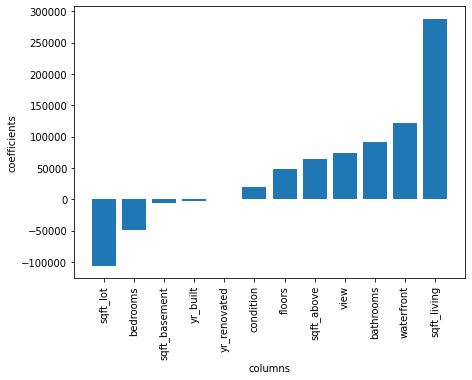

<Figure size 504x360 with 0 Axes>

In [56]:

 
coefficients2=coefficients2.sort_values(by = 'coefficients', ascending = True)
ax = plt.axes()
ax.bar(coefficients2['columns'],coefficients2['coefficients'])
ax.set(xlabel='columns', 
    ylabel='coefficients')
plt.xticks(rotation='vertical')  
plt.figure()